In [16]:
from sklearn import linear_model
import pandas as pd
import numpy as np

In [19]:
from sklearn import datasets  # mports datasets from scikit-learn
data = datasets.load_boston() # loads Boston dataset from datasets library

In [6]:
# define the data/predictors as the pre-set feature names 
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])


In [9]:
X = df
y = target["MEDV"]

In [10]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [12]:
predictions = lm.predict(X)
print(predictions[0:5])

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]


In [13]:
lm.score(X,y)

0.7406426641094095

In [14]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [15]:
lm.intercept_

36.459488385089855

### Regression diagnostics


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          6.72e-135
Time:                        08:44:59   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

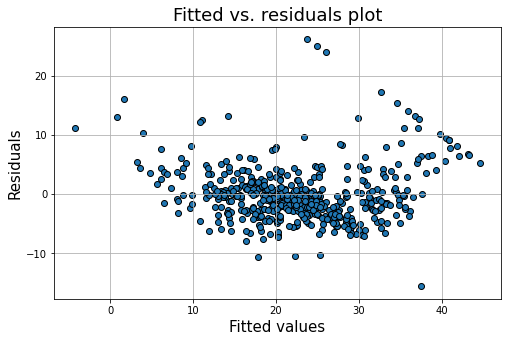

In [23]:
import statsmodels.api as sm # first fit the model using statsmodel
from matplotlib import pyplot as plt
model=sm.OLS(endog=y,exog=sm.add_constant(X))
fitted = model.fit()
print(fitted.summary())# this gives a nice summary of the regression model and 
#it includes the R squared value, model coefficients and their associated p values, 
#Durbin Watson statistics and many more. 
plt.figure(figsize=(8,5)) # plot residuals vs fitted values
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

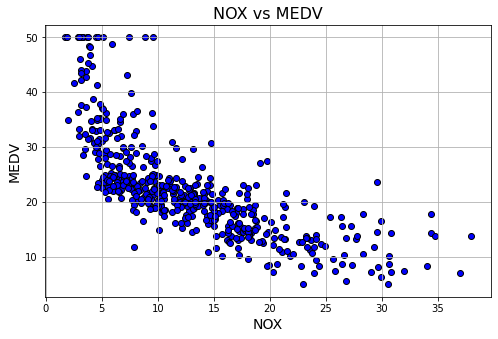

In [24]:
#checking for linearity assumption
plt.figure(figsize=(8,5))
plt.title("NOX vs MEDV",fontsize=16)
plt.scatter(x=X.iloc[:,12],y=y,color='blue',edgecolor='k')
plt.grid(True)
plt.xlabel("NOX",fontsize=14)
plt.ylabel('MEDV',fontsize=14)
plt.show()

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

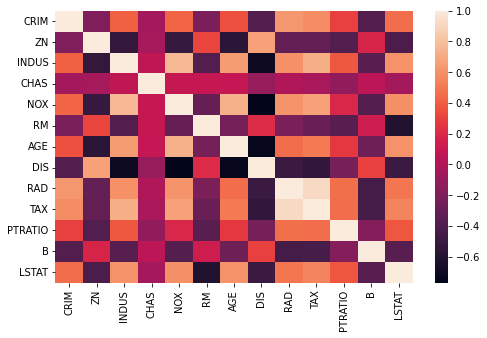

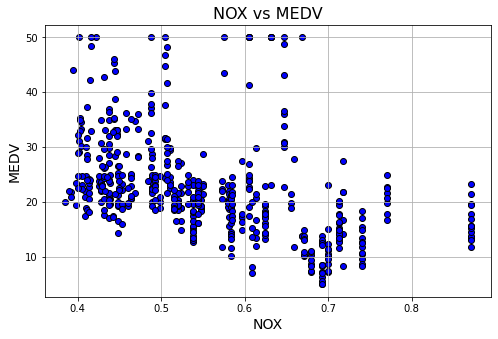

In [25]:
import seaborn as sns #plotting the correlation matrix
corr = X.corr()
print(corr)
plt.figure(figsize=(8,5))
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=
corr.columns.values )
import matplotlib.pyplot as plt # to plot scatter plots
plt.figure(figsize=(8,5))
plt.title("NOX vs MEDV",fontsize=16)
plt.scatter(x=X.iloc[:,4],y=y,color='blue',edgecolor='k')
plt.grid(True)
plt.xlabel("NOX",fontsize=14)
plt.ylabel('MEDV',fontsize=14)
plt.show()

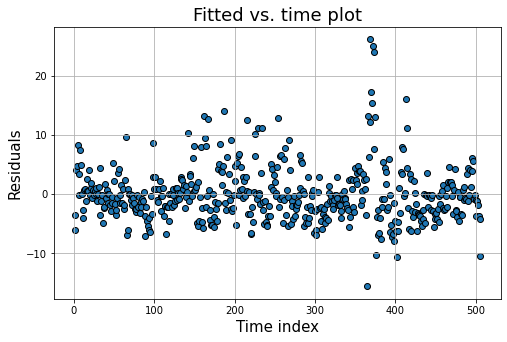

In [26]:
#correlation or error terms 
plt.figure(figsize=(8,5))
p=plt.scatter(x=np.arange(1,507,1),y=fitted.resid,edgecolor='k')
plt.xlabel("Time index",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. time plot",fontsize=18)
plt.grid(True)
plt.show()


<Figure size 576x360 with 0 Axes>

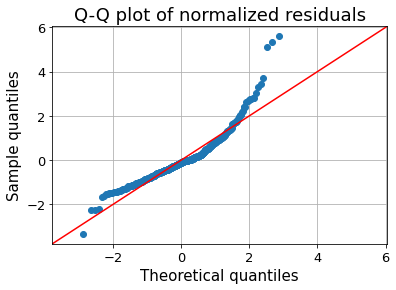

In [27]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()
